In [1]:
import os
import platform
import sys
import sklearn
import numpy as np
np.random.seed(260393)
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import warnings 
warnings.filterwarnings('ignore')

print("All packages imported!")
print("python=={}".format(platform.python_version()))
print("seaborn=={}".format(sns.__version__))
print("scikit-learn=={}".format(sklearn.__version__))
print("pandas=={}".format(pd.__version__))
print("numpy=={}".format(np.__version__))
print("matplotlib=={}".format(mp.__version__))

# You should see this output:
# All packages imported!
# python==3.7.6
# seaborn==0.11.0
# scikit-learn==0.23.2
# pandas==1.1.4
# numpy==1.19.4
# matplotlib==3.2.2

All packages imported!
python==3.8.5
seaborn==0.11.0
scikit-learn==1.0.dev0
pandas==1.3.1
numpy==1.19.2
matplotlib==3.3.2


In [2]:
df_loc = os.path.join(os.getcwd(), 'ESG-data-for-python .csv')
df_1 = pd.read_csv(df_loc)
df_1.head(30)

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,Gain or loss %,S&P,Alpha
0,POOL.OQ,31/12/2009,NaN,NaN,NaN,NaN,19.08,Leisure Goods,9.340977e+08,6.177,6.18%,23.45%,-17.27%
1,POOL.OQ,31/12/2010,NaN,NaN,NaN,NaN,22.54,Leisure Goods,1.120349e+09,18.134,18.13%,12.78%,5.35%
2,POOL.OQ,31/12/2011,NaN,NaN,NaN,NaN,30.10,Leisure Goods,1.433334e+09,33.540,33.54%,0.00%,33.54%
3,POOL.OQ,31/12/2012,NaN,NaN,NaN,NaN,42.32,Leisure Goods,1.976515e+09,40.598,40.60%,13.41%,27.19%
4,POOL.OQ,31/12/2013,NaN,NaN,NaN,NaN,58.14,Leisure Goods,2.670793e+09,37.382,37.38%,29.60%,7.78%
5,POOL.OQ,31/12/2014,NaN,NaN,NaN,NaN,63.44,Leisure Goods,2.754868e+09,9.116,9.12%,11.39%,-2.27%
6,POOL.OQ,31/12/2015,44.589480,2.022977,34.166808,74.615226,80.78,Leisure Goods,3.441286e+09,27.333,27.33%,-0.73%,28.06%
7,POOL.OQ,31/12/2016,47.332510,12.053571,36.498279,75.255474,104.34,Leisure Goods,4.313337e+09,29.166,29.17%,9.54%,19.63%
8,POOL.OQ,31/12/2017,34.338289,12.564935,36.792886,38.926327,129.65,Leisure Goods,5.207626e+09,24.257,24.26%,19.42%,4.84%
9,POOL.OQ,31/12/2018,43.593175,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,14.655,14.65%,-6.24%,20.89%


In [3]:
df_1['Instrument'].nunique()

505

In [4]:
indexNames_error = df_1[ df_1['Gain or loss %']== '#VALUE!' ].index
df_1 = df_1.drop(indexNames_error)
indexNames_error = df_1[ df_1['Alpha']== '#VALUE!' ].index
df_1 = df_1.drop(indexNames_error)

In [5]:
test = sorted(list(df_1['Instrument'].unique()))

In [6]:
df_1 ['E % change'] = df_1['Environmental Pillar score'].pct_change()
df_1 ['S % change'] = df_1['Social Pillar score'].pct_change()
df_1 ['G % change'] = df_1['Governance Pillar score'].pct_change()
df_1 ['ESG % change'] = df_1['ESG Score'].pct_change()
df_1

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
0,POOL.OQ,31/12/2009,NaN,NaN,NaN,NaN,19.08,Leisure Goods,9.340977e+08,6.177,6.18%,23.45%,-17.27%,NaN,NaN,NaN,NaN
1,POOL.OQ,31/12/2010,NaN,NaN,NaN,NaN,22.54,Leisure Goods,1.120349e+09,18.134,18.13%,12.78%,5.35%,NaN,NaN,NaN,NaN
2,POOL.OQ,31/12/2011,NaN,NaN,NaN,NaN,30.10,Leisure Goods,1.433334e+09,33.540,33.54%,0.00%,33.54%,NaN,NaN,NaN,NaN
3,POOL.OQ,31/12/2012,NaN,NaN,NaN,NaN,42.32,Leisure Goods,1.976515e+09,40.598,40.60%,13.41%,27.19%,NaN,NaN,NaN,NaN
4,POOL.OQ,31/12/2013,NaN,NaN,NaN,NaN,58.14,Leisure Goods,2.670793e+09,37.382,37.38%,29.60%,7.78%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,31/12/2016,64.982576,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,12.065,12.07%,9.54%,2.53%,0.188380,-0.157608,-0.204335,-0.048337
6056,AVY.N,31/12/2017,69.215448,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,63.572,63.57%,19.42%,44.15%,-0.016995,0.084618,0.205701,0.065139
6057,AVY.N,31/12/2018,58.365602,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,-21.792,-21.79%,-6.24%,-15.55%,-0.243257,-0.182247,0.033592,-0.156755
6058,AVY.N,31/12/2019,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,45.631,45.63%,28.88%,16.75%,-0.156090,0.057992,-0.247499,-0.106040


In [7]:
#Drop NA
df_1 = df_1.dropna()

#Drop 2009 data 
indexNames_2009 = df_1[ df_1['Date']== '31/12/09' ].index
df_1 = df_1.drop(indexNames_2009)

indexNames_2009 = df_1[ df_1['Date']== '31/12/2009' ].index
df_1 = df_1.drop(indexNames_2009)

In [8]:
df_1

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
7,POOL.OQ,31/12/2016,47.332510,12.053571,36.498279,75.255474,104.34,Leisure Goods,4.313337e+09,29.166,29.17%,9.54%,19.63%,4.958333,0.068238,0.008581,0.061517
8,POOL.OQ,31/12/2017,34.338289,12.564935,36.792886,38.926327,129.65,Leisure Goods,5.207626e+09,24.257,24.26%,19.42%,4.84%,0.042424,0.008072,-0.482744,-0.274531
9,POOL.OQ,31/12/2018,43.593175,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,14.655,14.65%,-6.24%,20.89%,0.059619,-0.044139,0.704480,0.269521
10,POOL.OQ,31/12/2019,46.350115,14.062500,29.707335,81.211420,212.38,Leisure Goods,8.503214e+09,42.873,42.87%,28.88%,13.99%,0.056215,-0.155295,0.224001,0.063242
11,POOL.OQ,31/12/2020,42.336953,20.053476,28.856603,69.155379,372.50,Leisure Goods,1.495907e+10,75.393,75.39%,16.26%,59.13%,0.426025,-0.028637,-0.148453,-0.086584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,31/12/2016,64.982576,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,12.065,12.07%,9.54%,2.53%,0.188380,-0.157608,-0.204335,-0.048337
6056,AVY.N,31/12/2017,69.215448,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,63.572,63.57%,19.42%,44.15%,-0.016995,0.084618,0.205701,0.065139
6057,AVY.N,31/12/2018,58.365602,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,-21.792,-21.79%,-6.24%,-15.55%,-0.243257,-0.182247,0.033592,-0.156755
6058,AVY.N,31/12/2019,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,45.631,45.63%,28.88%,16.75%,-0.156090,0.057992,-0.247499,-0.106040


In [9]:
#Change alpha to numbers
df_1['Alpha'] = df_1['Alpha'].str.replace(r'\%', '')
df_1['Alpha'] = pd.to_numeric(df_1['Alpha'])

df_1['Gain or loss %'] = df_1['Gain or loss %'].str.replace(r'\%', '')
df_1['Gain or loss %'] = pd.to_numeric(df_1['Gain or loss %'])

In [10]:
#Cleaning Zeros from data

indexNames = df_1[ df_1['Environmental Pillar score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_1.drop(indexNames , inplace=True)

indexNames_2 = df_1[ df_1['Social Pillar score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_1.drop(indexNames_2 , inplace=True)

indexNames_3 = df_1[ df_1['Governance Pillar score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_1.drop(indexNames_3 , inplace=True)

indexNames_4 = df_1[ df_1['ESG Score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_1.drop(indexNames_4 , inplace=True)

In [11]:
df_1 = df_1.drop(" Gain or loss ", axis=1)
df_1

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
7,POOL.OQ,31/12/2016,47.332510,12.053571,36.498279,75.255474,104.34,Leisure Goods,4.313337e+09,29.17,9.54%,19.63,4.958333,0.068238,0.008581,0.061517
8,POOL.OQ,31/12/2017,34.338289,12.564935,36.792886,38.926327,129.65,Leisure Goods,5.207626e+09,24.26,19.42%,4.84,0.042424,0.008072,-0.482744,-0.274531
9,POOL.OQ,31/12/2018,43.593175,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,14.65,-6.24%,20.89,0.059619,-0.044139,0.704480,0.269521
10,POOL.OQ,31/12/2019,46.350115,14.062500,29.707335,81.211420,212.38,Leisure Goods,8.503214e+09,42.87,28.88%,13.99,0.056215,-0.155295,0.224001,0.063242
11,POOL.OQ,31/12/2020,42.336953,20.053476,28.856603,69.155379,372.50,Leisure Goods,1.495907e+10,75.39,16.26%,59.13,0.426025,-0.028637,-0.148453,-0.086584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,31/12/2016,64.982576,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,12.07,9.54%,2.53,0.188380,-0.157608,-0.204335,-0.048337
6056,AVY.N,31/12/2017,69.215448,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,63.57,19.42%,44.15,-0.016995,0.084618,0.205701,0.065139
6057,AVY.N,31/12/2018,58.365602,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,-21.79,-6.24%,-15.55,-0.243257,-0.182247,0.033592,-0.156755
6058,AVY.N,31/12/2019,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,45.63,28.88%,16.75,-0.156090,0.057992,-0.247499,-0.106040


In [12]:
df_1['Instrument'].nunique()

486

In [13]:
# Top E & S score - low G

#Drop rows with low E score
indexNames_5 = df_1[ df_1['Environmental Pillar score']<= 75 ].index
df_top_E_and_S = df_1.drop(indexNames_5)

#Drop rows with low S score
indexNames_6 = df_top_E_and_S[ df_1['Social Pillar score']<=75 ].index
df_top_E_and_S = df_top_E_and_S.drop(indexNames_6)
df_top_E_and_S

#Drop rows with high G score
indexNames_7 = df_top_E_and_S[ df_1['Governance Pillar score'] >= 50 ].index
df_top_E_and_S = df_top_E_and_S.drop(indexNames_7)

df_top_E_and_S 

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
65,WM.N,31/12/2014,68.486896,86.967041,78.967224,42.159265,51.32,Waste and Disposal Services,2.350050e+10,14.37,11.39%,2.98,-0.004737,0.112074,-0.459707,-0.113042
110,LIN.N,31/12/2011,73.844649,89.390764,85.201061,27.137037,106.90,Chemicals,3.204429e+10,11.97,0.00%,11.97,0.034688,0.096858,-0.683594,-0.109689
111,LIN.N,31/12/2012,72.517289,80.944245,89.427537,28.976190,109.45,Chemicals,3.252049e+10,2.39,13.41%,-11.02,-0.094490,0.049606,0.067773,-0.017975
113,LIN.N,31/12/2014,66.811495,76.504943,82.822668,22.556361,129.56,Chemicals,3.775023e+10,-0.36,11.39%,-11.75,0.031659,-0.070541,-0.085822,-0.028110
114,LIN.N,31/12/2015,68.784102,79.864816,84.261575,22.982456,102.40,Chemicals,2.916818e+10,-20.96,-0.73%,-20.23,0.043917,0.017373,0.018890,0.029525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,PEAK.N,31/12/2017,73.754895,85.561949,90.258113,44.485311,26.08,Real Estate Investment Trusts,1.223435e+10,-12.25,19.42%,-31.67,0.004871,0.002696,-0.347469,-0.091167
5682,DAL.N,31/12/2015,70.578946,77.279874,85.400369,41.387494,50.69,Travel and Leisure,3.986635e+10,3.05,-0.73%,3.78,0.042493,0.226514,0.109000,0.138918
5770,ETN.N,31/12/2019,67.393486,87.124555,79.702758,27.577381,94.72,General Industrials,3.915725e+10,37.96,28.88%,9.08,0.054189,-0.019947,-0.456379,-0.077591
5771,ETN.N,31/12/2020,69.136060,90.505726,77.553967,32.455649,120.14,General Industrials,4.788780e+10,26.84,16.26%,10.58,0.038808,-0.026960,0.176894,0.025857


In [14]:
#TOP ES
list_of_dates = sorted(list(df_top_E_and_S['Date'].unique()))
alpha_dict_ES = {list_of_dates[i] : 0 for i in range(len(list_of_dates))}
for date in list_of_dates:
    alpha_temp = 0
    year_filtered_df = df_top_E_and_S[df_top_E_and_S['Date']== date]
    total_market_cap = sum(year_filtered_df['Market Cap'])
    for i in range(year_filtered_df.shape[0]):
        MC_weight = list(year_filtered_df['Market Cap'])[i]/total_market_cap
        asset_alpha = list(year_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    alpha_dict_ES[date] = alpha_temp

In [15]:
alpha_dict_ES

{'31/12/2010': 11.050499062901023,
 '31/12/2011': -8.622337378812865,
 '31/12/2012': -2.8214280903676268,
 '31/12/2013': -4.89724371010091,
 '31/12/2014': -4.366699577525519,
 '31/12/2015': -0.2736911182932753,
 '31/12/2016': -1.5404792697038712,
 '31/12/2017': -20.591481687580043,
 '31/12/2018': 4.840494631267653,
 '31/12/2019': -2.9879485080296746,
 '31/12/2020': 3.6208105516887232}

In [16]:
df_ES = pd.DataFrame(list(alpha_dict_ES.items()),columns = ['Year','alpha'])
df_ES =df_ES.drop('Year', axis=1)
df_ES

,alpha
0,11.050499
1,-8.622337
2,-2.821428
3,-4.897244
4,-4.366700
5,-0.273691
6,-1.540479
7,-20.591482
8,4.840495
9,-2.987949


In [17]:
# Top E & G score - low S

#Drop rows with low E score
indexNames_8 = df_1[ df_1['Environmental Pillar score']<=75 ].index
df_top_E_and_G = df_1.drop(indexNames_8)
df_top_E_and_G

#Drop rows with low G score
indexNames_9 = df_top_E_and_G[ df_top_E_and_G['Governance Pillar score']<= 75 ].index
df_top_E_and_G = df_top_E_and_G.drop(indexNames_9)

#Drop rows with high S score
indexNames_10 = df_top_E_and_G[ df_top_E_and_G['Social Pillar score'] >= 50 ].index
df_top_E_and_G = df_top_E_and_G.drop(indexNames_10)

df_top_E_and_G


,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
2302,PKG.N,31/12/2019,67.273034,77.920109,43.813135,90.699014,111.990000,General Industrials,1.060074e+10,34.18,28.88%,5.30,0.533936,0.091572,0.100715,0.245794
2303,PKG.N,31/12/2020,68.855224,84.774225,48.827284,78.382321,137.910000,General Industrials,1.307812e+10,23.14,16.26%,6.88,0.087963,0.114444,-0.135797,0.023519
2847,RTX.N,31/12/2012,63.305862,75.990745,45.172457,78.584450,48.370696,Aerospace and Defense,7.516582e+10,12.20,13.41%,-1.21,-0.008630,-0.131253,0.183294,0.012616
3284,RSG.N,31/12/2017,64.452072,77.962167,40.280574,85.880808,67.610000,Waste and Disposal Services,2.259692e+10,18.51,19.42%,-0.91,0.052329,0.169815,0.056780,0.083555
3285,RSG.N,31/12/2018,70.576098,81.617809,49.945649,89.208031,72.090000,Waste and Disposal Services,2.339829e+10,6.63,-6.24%,12.87,0.046890,0.239944,0.038742,0.095017
4178,INTU.OQ,31/12/2011,67.951952,80.350838,49.747574,79.908278,52.590000,Software & Computer Services,1.563231e+10,6.67,0.00%,6.67,0.089174,0.098289,0.902329,0.423787
4179,INTU.OQ,31/12/2012,61.015158,76.568405,38.308403,75.902222,59.500000,Software & Computer Services,1.761323e+10,13.14,13.41%,-0.27,-0.047074,-0.229944,-0.050133,-0.102084
4525,PPG.N,31/12/2010,66.367820,80.828464,40.406882,84.810050,42.035000,General Industrials,1.370503e+10,43.61,12.78%,30.83,0.065691,0.095106,0.168589,0.100278
4529,PPG.N,31/12/2014,63.213496,83.746017,33.819686,76.745551,115.575000,General Industrials,3.172188e+10,21.88,11.39%,10.49,0.059701,-0.034846,0.427998,0.115807
5091,ADSK.OQ,31/12/2012,68.319338,77.696161,41.830689,88.315960,35.350000,Software & Computer Services,7.943145e+09,16.55,13.41%,3.14,0.086074,-0.001065,0.074839,0.056971


In [18]:
#TOP EG
list_of_dates = sorted(list(df_top_E_and_G['Date'].unique()))
alpha_dict_EG = {list_of_dates[i] : 0 for i in range(len(list_of_dates))}
for date in list_of_dates:
    alpha_temp = 0
    year_filtered_df = df_top_E_and_G[df_top_E_and_G['Date']== date]
    total_market_cap = sum(year_filtered_df['Market Cap'])
    for i in range(year_filtered_df.shape[0]):
        MC_weight = list(year_filtered_df['Market Cap'])[i]/total_market_cap
        asset_alpha = list(year_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    alpha_dict_EG[date] = alpha_temp

In [19]:
alpha_dict_EG

{'31/12/2010': 30.83,
 '31/12/2011': 6.67,
 '31/12/2012': -0.7025734282501086,
 '31/12/2014': 10.49,
 '31/12/2017': -0.91,
 '31/12/2018': 12.87,
 '31/12/2019': 5.3,
 '31/12/2020': 6.88}

In [20]:
df_EG = pd.DataFrame(list(alpha_dict_EG.items()),columns = ['Year','alpha'])
df_EG =df_EG.drop('Year', axis=1)
df_EG

,alpha
0,30.830000
1,6.670000
2,-0.702573
3,10.490000
4,-0.910000
5,12.870000
6,5.300000
7,6.880000


In [21]:
# Top G & S score - low E

#Drop rows with low G score
indexNames_11 = df_1[ df_1['Governance Pillar score']<= 50 ].index
df_top_G_and_S = df_1.drop(indexNames_11)
df_top_G_and_S

#Drop rows with low S score
indexNames_12 = df_top_G_and_S[ df_top_G_and_S['Social Pillar score']<= 50 ].index
df_top_G_and_S = df_top_G_and_S.drop(indexNames_12)
df_top_G_and_S


#Drop rows with high E score
indexNames_13 = df_top_G_and_S[ df_top_G_and_S['Environmental Pillar score']>= 50 ].index
df_top_G_and_S = df_top_G_and_S.drop(indexNames_13)

df_top_G_and_S


,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
28,AJG.N,31/12/2013,50.781932,2.820682,57.703875,58.693416,46.93,Non-life Insurance,6.269848e+09,35.44,29.60%,5.84,inf,0.431240,-0.136681,0.103737
29,AJG.N,31/12/2014,50.147644,2.868405,53.841857,61.597475,47.08,Non-life Insurance,7.749368e+09,0.32,11.39%,-11.07,0.016919,-0.066928,0.049478,-0.012490
33,AJG.N,31/12/2018,56.547799,18.949263,53.051645,73.159491,73.70,Non-life Insurance,1.353515e+10,16.47,-6.24%,22.71,-0.012726,0.079096,0.072649,0.071312
35,AJG.N,31/12/2020,57.252945,24.538843,50.763708,75.728421,123.71,Non-life Insurance,2.379215e+10,29.91,16.26%,13.65,-0.078138,0.056489,0.136757,0.088058
78,PRGO.N,31/12/2015,59.116161,47.427245,59.584359,66.988335,144.70,Pharmaceuticals and Biotechnology,2.118438e+10,-13.44,-0.73%,-12.71,-0.084421,-0.141046,0.194785,-0.034936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,SCHW.N,31/12/2020,51.499594,17.783711,60.968321,53.618544,53.04,Investment Banking and Brokerage Services,9.952987e+10,11.52,16.26%,-4.74,0.026510,-0.037093,0.166912,0.055671
6021,SNPS.OQ,31/12/2018,53.710645,23.110612,54.149257,62.512960,84.24,Software & Computer Services,1.259514e+10,-1.17,-6.24%,5.07,0.207771,0.003708,0.465028,0.223553
6047,SIVB.OQ,31/12/2020,51.081084,3.811982,51.945756,68.797399,387.83,Banks,2.012390e+10,54.49,16.26%,38.23,0.450614,0.175716,-0.050323,0.055999
6058,AVY.N,31/12/2019,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,45.63,28.88%,16.75,-0.156090,0.057992,-0.247499,-0.106040


In [22]:
#TOP GS
list_of_dates_ = sorted(list(df_top_G_and_S['Date'].unique()))
alpha_dict_GS = {list_of_dates[i] : 0 for i in range(len(list_of_dates))}
for date in list_of_dates:
    alpha_temp = 0
    year_filtered_df = df_top_G_and_S[df_top_G_and_S['Date']== date]
    total_market_cap = sum(year_filtered_df['Market Cap'])
    for i in range(year_filtered_df.shape[0]):
        MC_weight = list(year_filtered_df['Market Cap'])[i]/total_market_cap
        asset_alpha = list(year_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    alpha_dict_GS[date] = alpha_temp

In [23]:
alpha_dict_GS

{'31/12/2010': 11.713171477000275,
 '31/12/2011': 5.993448667858791,
 '31/12/2012': 13.594782881555373,
 '31/12/2014': 7.045939506162511,
 '31/12/2017': 19.634984951535593,
 '31/12/2018': 4.496536418114888,
 '31/12/2019': 5.324840217904423,
 '31/12/2020': 14.304680290019409}

In [24]:
df_GS = pd.DataFrame(list(alpha_dict_GS.items()),columns = ['Year','alpha'])
df_GS =df_GS.drop('Year', axis=1)
df_GS

,alpha
0,11.713171
1,5.993449
2,13.594783
3,7.045940
4,19.634985
5,4.496536
6,5.324840
7,14.304680


In [25]:
df_top_E_and_S_mean = df_top_E_and_S ['Alpha'].mean()
df_top_E_and_G_mean = df_top_E_and_G ['Alpha'].mean()
df_top_G_and_S_mean = df_top_G_and_S ['Alpha'].mean()
print(df_top_E_and_S_mean)
print(df_top_E_and_G_mean)
print(df_top_G_and_S_mean)

-3.7377777777777776
7.379
3.9014919354838717


In [26]:
# Top E & S score with improving G score

#Drop rows with low E score
indexNames_5 = df_1[ df_1['Environmental Pillar score']<= 75 ].index
df_ES_improving_G = df_1.drop(indexNames_5)

#Drop rows with low S score
indexNames_6 = df_ES_improving_G[ df_1['Social Pillar score']<=75 ].index
df_ES_improving_G = df_ES_improving_G.drop(indexNames_6)

#Drop rows with low improving G score - anything less than 10% YoY
indexNames_14 = df_ES_improving_G[ df_1['G % change'] <= 0.2 ].index
df_ES_improving_G = df_ES_improving_G.drop(indexNames_14)

df_ES_improving_G

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
66,WM.N,31/12/2015,78.767249,87.259500,75.018807,77.612348,53.37,Waste and Disposal Services,2.382945e+10,3.99,-0.73%,4.72,0.003363,-0.050001,0.840932,0.150107
67,WM.N,31/12/2016,85.903204,90.312893,77.237276,93.889552,70.91,Waste and Disposal Services,3.134244e+10,32.86,9.54%,23.32,0.034992,0.029572,0.209724,0.090595
117,LIN.N,31/12/2018,75.831393,87.003319,95.512449,22.745869,156.04,Chemicals,8.598655e+10,0.88,-6.24%,7.12,0.078168,0.065813,0.213884,0.080298
118,LIN.N,31/12/2019,85.814590,86.211604,95.735026,68.303571,212.90,Chemicals,1.140000e+11,36.44,28.88%,7.56,-0.009100,0.002330,2.002900,0.131650
121,WY.N,31/12/2010,89.310646,81.657918,94.812892,93.072830,18.93,Real Estate Investment Trusts,1.014539e+10,18.66,12.78%,5.88,-0.001748,-0.000761,0.488715,0.122730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,VFC.N,31/12/2020,79.734397,80.504166,82.234078,74.622465,85.41,Personal Goods,3.331026e+10,-14.30,16.26%,-30.56,0.420157,0.724477,1.129807,0.745060
5768,ETN.N,31/12/2017,74.955832,86.081295,76.933828,59.011905,79.01,General Industrials,3.481181e+10,17.77,19.42%,-1.65,-0.018302,0.078476,0.598934,0.116774
5783,CVX.N,31/12/2020,84.230669,78.954104,87.685564,85.808402,84.45,"Oil, Gas and Coal",1.630000e+11,-29.92,16.26%,-46.18,-0.019816,0.007765,0.391667,0.068704
5814,ACN.N,31/12/2015,85.706190,79.958347,89.971645,83.757511,104.50,Industrial Support Services,6.875204e+10,17.01,-0.73%,17.74,0.036813,0.079195,0.465971,0.218072


In [27]:
# Top E & S score with improving G score
list_of_dates = sorted(list(df_ES_improving_G['Date'].unique()))
alpha_dict_ES_Improv_G = {list_of_dates[i] : 0 for i in range(len(list_of_dates))}
for date in list_of_dates:
    alpha_temp = 0
    year_filtered_df = df_ES_improving_G[df_ES_improving_G['Date']== date]
    total_market_cap = sum(year_filtered_df['Market Cap'])
    for i in range(year_filtered_df.shape[0]):
        MC_weight = list(year_filtered_df['Market Cap'])[i]/total_market_cap
        asset_alpha = list(year_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    alpha_dict_ES_Improv_G[date] = alpha_temp


In [28]:
alpha_dict_ES_Improv_G

{'31/12/2010': -14.856889756754468,
 '31/12/2011': 18.66386409246893,
 '31/12/2012': -3.5103443404196395,
 '31/12/2013': -6.180620183994989,
 '31/12/2014': 6.980060887423263,
 '31/12/2015': 16.802658412023973,
 '31/12/2016': 3.80178455693687,
 '31/12/2017': -5.061377883681833,
 '31/12/2018': 5.093373760942033,
 '31/12/2019': -9.60134411039223,
 '31/12/2020': -4.0612347412419645}

In [29]:
df_ES_G = pd.DataFrame(list(alpha_dict_ES_Improv_G.items()),columns = ['Year','alpha'])
df_ES_G =df_ES_G.drop('Year', axis=1)
df_ES_G

,alpha
0,-14.856890
1,18.663864
2,-3.510344
3,-6.180620
4,6.980061
5,16.802658
6,3.801785
7,-5.061378
8,5.093374
9,-9.601344


In [30]:
# Top E & G score - Improving S

#Drop rows with low E score
indexNames_8 = df_1[ df_1['Environmental Pillar score']<= 75 ].index
df_EG_improving_S = df_1.drop(indexNames_8)

#Drop rows with low G score
indexNames_9 = df_EG_improving_S[ df_EG_improving_S['Governance Pillar score']<= 75 ].index
df_EG_improving_S = df_EG_improving_S.drop(indexNames_9)

#Drop rows with low improving S score - anything less than 10% YoY
indexNames_15 = df_EG_improving_S[ df_EG_improving_S['S % change'] < 0.1 ].index
df_EG_improving_S = df_EG_improving_S.drop(indexNames_15)

df_EG_improving_S

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
69,WM.N,31/12/2018,90.135079,92.228015,88.155113,91.199981,88.99,Waste and Disposal Services,3.794062e+10,3.12,-6.24%,9.36,0.015087,0.186463,0.033821,0.087721
90,BA.N,31/12/2015,73.276977,83.508478,64.014394,78.329820,144.59,Aerospace and Defense,9.687293e+10,11.24,-0.73%,11.97,-0.037484,0.198314,0.720572,0.246636
93,BA.N,31/12/2018,79.711343,81.548598,80.189167,77.716306,322.50,Aerospace and Defense,1.830000e+11,9.36,-6.24%,15.60,0.044510,0.385462,-0.016704,0.146547
109,LIN.N,31/12/2010,82.942543,86.393973,77.677414,85.766488,95.47,Chemicals,2.925007e+10,18.88,12.78%,6.10,-0.022005,0.198162,-0.051897,0.038273
539,SYY.N,31/12/2020,77.661378,79.440063,74.990841,80.496453,74.26,"Personal Care, Drug and Grocery Stores",3.782497e+10,-13.19,16.26%,-29.45,0.023934,0.114926,0.032446,0.066081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,XYL.N,31/12/2019,78.230204,75.359519,79.312691,80.255764,78.79,Electronic and Electrical Equipment,1.418841e+10,18.09,28.88%,-10.79,0.028825,0.149435,-0.021598,0.054844
5934,NRG.N,31/12/2015,78.050832,93.632487,58.099659,77.498542,11.77,Electricity,3.697855e+09,-56.33,-0.73%,-55.60,0.072259,0.147026,0.201786,0.119880
5957,LMT.N,31/12/2014,75.174712,83.248325,66.238505,81.367589,192.57,Aerospace and Defense,6.083771e+10,29.54,11.39%,18.15,0.547097,0.137237,1.290122,0.508377
5959,LMT.N,31/12/2016,83.123809,92.038391,80.747376,79.807838,249.94,Aerospace and Defense,7.322676e+10,15.10,9.54%,5.56,0.062871,0.252882,0.011393,0.117438


In [31]:
# Top E & G score - Improving S

list_of_dates = sorted(list(df_EG_improving_S['Date'].unique()))
alpha_dict_EG_Improv_S = {list_of_dates[i] : 0 for i in range(len(list_of_dates))}
for date in list_of_dates:
    alpha_temp = 0
    year_filtered_df = df_EG_improving_S[df_EG_improving_S['Date']== date]
    total_market_cap = sum(year_filtered_df['Market Cap'])
    for i in range(year_filtered_df.shape[0]):
        MC_weight = list(year_filtered_df['Market Cap'])[i]/total_market_cap
        asset_alpha = list(year_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    alpha_dict_EG_Improv_S[date] = alpha_temp


In [32]:
alpha_dict_EG_Improv_S

{'31/12/2010': -5.728985516960284,
 '31/12/2011': 8.4023274676964,
 '31/12/2012': -7.12,
 '31/12/2013': 3.4816672001039692,
 '31/12/2014': 4.488215253638643,
 '31/12/2015': -10.383140684762868,
 '31/12/2016': 12.872545240874844,
 '31/12/2017': -3.440516210348206,
 '31/12/2018': -0.6221709207009336,
 '31/12/2019': -4.938481567797716,
 '31/12/2020': -19.102183299411433}

In [33]:
df_EG_S = pd.DataFrame(list(alpha_dict_EG_Improv_S.items()),columns = ['Year','alpha'])
df_EG_S =df_EG_S.drop('Year', axis=1)
df_EG_S

,alpha
0,-5.728986
1,8.402327
2,-7.120000
3,3.481667
4,4.488215
5,-10.383141
6,12.872545
7,-3.440516
8,-0.622171
9,-4.938482


In [34]:
# Top G & S score with improving E score 

#Drop rows with low G score
indexNames_11 = df_1[ df_1['Governance Pillar score']< 74.99 ].index
df_GS_improving_E = df_1.drop(indexNames_11)


#Drop rows with low S score
indexNames_12 = df_GS_improving_E[ df_GS_improving_E['Social Pillar score']< 74.99 ].index
df_GS_improving_E = df_GS_improving_E.drop(indexNames_12)



#Drop rows with low improving E score - anything less than 10% YoY
indexNames_16 = df_GS_improving_E[ df_GS_improving_E['E % change'] < 0.2].index
df_GS_improving_E = df_GS_improving_E.drop(indexNames_16)

df_GS_improving_E


,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
365,MOS.N,31/12/2014,73.278171,56.397615,84.852369,83.488649,45.650000,Chemicals,1.677821e+10,-3.43,11.39%,-14.82,0.237731,0.200382,-0.010553,0.148417
656,CL.N,31/12/2017,88.012673,81.532518,87.075824,96.314479,75.450000,"Personal Care, Drug and Grocery Stores",6.625304e+10,15.30,19.42%,-4.12,0.209363,0.012407,0.096188,0.076402
794,CBRE.N,31/12/2011,79.089239,65.053479,79.827038,91.845561,15.220000,Real Estate Investment and Services Development,4.991666e+09,-25.68,0.00%,-25.68,0.233760,0.070578,0.064935,0.106296
796,CBRE.N,31/12/2013,80.781537,74.086129,78.955105,89.262839,26.300000,Real Estate Investment and Services Development,8.715653e+09,32.16,29.60%,2.56,0.229027,0.013070,-0.051763,0.040285
959,JPM.N,31/12/2020,81.767672,81.399953,82.964205,80.266204,127.070000,Banks,3.870000e+11,-8.85,16.26%,-25.11,0.406085,-0.004374,0.118570,0.083013
995,CDW.OQ,31/12/2020,75.039021,39.919342,78.715233,82.409298,131.790000,Technology Hardware & Equipment,1.884442e+10,-7.74,16.26%,-24.00,0.317909,-0.009680,0.667616,0.277418
1451,KMI.N,31/12/2020,83.246156,86.322421,85.926752,75.844778,13.670000,"Oil, Gas and Coal",3.094606e+10,-35.43,16.26%,-51.69,0.323982,0.231728,0.246715,0.265309
1498,VTRS.OQ,31/12/2019,85.073762,70.702264,89.330426,89.251511,20.100000,Pharmaceuticals and Biotechnology,1.037426e+10,-26.64,28.88%,-55.52,0.287434,0.381998,0.131305,0.272683
1569,LH.N,31/12/2018,74.649674,51.969697,83.461369,75.415629,126.360000,Medical Equipment and Services,1.274972e+10,-20.78,-6.24%,-14.54,3.180171,0.095366,0.078149,0.202595
2128,BAX.N,31/12/2013,79.629775,77.277132,77.702628,83.265085,37.783594,Medical Equipment and Services,3.774462e+10,4.34,29.60%,-25.26,0.266723,-0.041242,-0.017819,0.007646


In [35]:
# Top G & S score - Improving E

list_of_dates = sorted(list(df_GS_improving_E['Date'].unique()))
alpha_dict_GS_Improv_E = {list_of_dates[i] : 0 for i in range(len(list_of_dates))}
for date in list_of_dates:
    alpha_temp = 0
    year_filtered_df = df_GS_improving_E[df_GS_improving_E['Date']== date]
    total_market_cap = sum(year_filtered_df['Market Cap'])
    for i in range(year_filtered_df.shape[0]):
        MC_weight = list(year_filtered_df['Market Cap'])[i]/total_market_cap
        asset_alpha = list(year_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    alpha_dict_GS_Improv_E[date] = alpha_temp


In [36]:
alpha_dict_GS_Improv_E

{'31/12/2011': 15.064046552233657,
 '31/12/2013': -27.71837410122329,
 '31/12/2014': -14.82,
 '31/12/2015': 8.08,
 '31/12/2016': -8.16,
 '31/12/2017': 18.29905380774518,
 '31/12/2018': 1.17323498745677,
 '31/12/2019': -6.406243513894091,
 '31/12/2020': -27.102120148748273}

In [37]:
df_GS_E = pd.DataFrame(list(alpha_dict_GS_Improv_E.items()),columns = ['Year','alpha'])
df_GS_E =df_GS_E.drop('Year', axis=1)
df_GS_E

,alpha
0,15.064047
1,-27.718374
2,-14.820000
3,8.080000
4,-8.160000
5,18.299054
6,1.173235
7,-6.406244
8,-27.102120


In [38]:
df_ES_improving_G = df_ES_improving_G ['Alpha'].mean()
df_EG_improving_S = df_EG_improving_S ['Alpha'].mean()
df_GS_improving_E = df_GS_improving_E ['Alpha'].mean()
print(df_ES_improving_G)
print(df_EG_improving_S)
print(df_GS_improving_E)

-1.5295348837209297
-6.655882352941178
-15.255


# Risk adjusted returns (beta)

In [39]:

df_loc = os.path.join(os.getcwd(), 'ESG-data-for-python-beta.csv')
df_2 = pd.read_csv(df_loc)
df_2 ['E % change'] = df_2['Environmental Pillar score'].pct_change()
df_2 ['S % change'] = df_2['Social Pillar score'].pct_change()
df_2 ['G % change'] = df_2['Governance Pillar score'].pct_change()
df_2 ['ESG % change'] = df_1['ESG Score'].pct_change()
#Drop NA
df_2 = df_2.dropna()


In [40]:
df_2

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,Gain or loss %,S&P,Alpha,Beta,E % change,S % change,G % change,ESG % change
8,POOL.OQ,31/12/17,34.338289,12.564935,36.792886,38.926327,129.65,Leisure Goods,5.207626e+09,25.340862,25.34%,19.42%,5.92%,0.956319,0.042424,0.008072,-0.482744,-0.274531
9,POOL.OQ,31/12/18,43.593175,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,20.733100,20.73%,-6.24%,26.97%,1.031686,0.059619,-0.044139,0.704480,0.269521
10,POOL.OQ,31/12/19,46.350115,14.062500,29.707335,81.211420,212.38,Leisure Goods,8.503214e+09,14.930285,14.93%,28.88%,-13.95%,0.864761,0.056215,-0.155295,0.224001,0.063242
11,POOL.OQ,31/12/20,42.336953,20.053476,28.856603,69.155379,372.50,Leisure Goods,1.495907e+10,42.072130,42.07%,16.26%,25.81%,0.715176,0.426025,-0.028637,-0.148453,-0.086584
18,CHRW.OQ,31/12/15,30.799031,8.848318,59.132340,20.306584,62.02,Industrial Transportation,8.907614e+09,23.708282,23.71%,-0.73%,24.43%,0.379111,3.362648,0.365000,0.155889,0.412461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,31/12/16,64.982576,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,20.990223,20.99%,9.54%,11.46%,1.052266,0.188380,-0.157608,-0.204335,-0.048337
6056,AVY.N,31/12/17,69.215448,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,9.468760,9.47%,19.42%,-9.95%,1.256530,-0.016995,0.084618,0.205701,0.065139
6057,AVY.N,31/12/18,58.365602,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,61.815885,61.82%,-6.24%,68.05%,1.279211,-0.243257,-0.182247,0.033592,-0.156755
6058,AVY.N,31/12/19,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,-23.827333,-23.83%,28.88%,-52.71%,1.311664,-0.156090,0.057992,-0.247499,-0.106040


In [41]:
#Cleaning Zeros from data

indexNames = df_2[ df_2['Environmental Pillar score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_2.drop(indexNames , inplace=True)

indexNames_2 = df_2[ df_2['Social Pillar score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_2.drop(indexNames_2 , inplace=True)

indexNames_3 = df_2[ df_2['Governance Pillar score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_2.drop(indexNames_3 , inplace=True)

indexNames_4 = df_2[ df_2['ESG Score'] < 0.0001 ].index
# Delete these row indexes from dataFrame
df_2.drop(indexNames_4 , inplace=True)

#Change alpha to numbers
df_2['Alpha'] = df_2['Alpha'].str.replace(r'\%', '')
df_2['Alpha'] = pd.to_numeric(df_2['Alpha'])

#Change S&P to numbers
df_2['S&P'] = df_2['S&P'].str.replace(r'\%', '')
df_2['S&P'] = pd.to_numeric(df_2['S&P'])

In [42]:
df_2

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,Gain or loss %,S&P,Alpha,Beta,E % change,S % change,G % change,ESG % change
8,POOL.OQ,31/12/17,34.338289,12.564935,36.792886,38.926327,129.65,Leisure Goods,5.207626e+09,25.340862,25.34%,19.42,5.92,0.956319,0.042424,0.008072,-0.482744,-0.274531
9,POOL.OQ,31/12/18,43.593175,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,20.733100,20.73%,-6.24,26.97,1.031686,0.059619,-0.044139,0.704480,0.269521
10,POOL.OQ,31/12/19,46.350115,14.062500,29.707335,81.211420,212.38,Leisure Goods,8.503214e+09,14.930285,14.93%,28.88,-13.95,0.864761,0.056215,-0.155295,0.224001,0.063242
11,POOL.OQ,31/12/20,42.336953,20.053476,28.856603,69.155379,372.50,Leisure Goods,1.495907e+10,42.072130,42.07%,16.26,25.81,0.715176,0.426025,-0.028637,-0.148453,-0.086584
18,CHRW.OQ,31/12/15,30.799031,8.848318,59.132340,20.306584,62.02,Industrial Transportation,8.907614e+09,23.708282,23.71%,-0.73,24.43,0.379111,3.362648,0.365000,0.155889,0.412461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,31/12/16,64.982576,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,20.990223,20.99%,9.54,11.46,1.052266,0.188380,-0.157608,-0.204335,-0.048337
6056,AVY.N,31/12/17,69.215448,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,9.468760,9.47%,19.42,-9.95,1.256530,-0.016995,0.084618,0.205701,0.065139
6057,AVY.N,31/12/18,58.365602,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,61.815885,61.82%,-6.24,68.05,1.279211,-0.243257,-0.182247,0.033592,-0.156755
6058,AVY.N,31/12/19,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,-23.827333,-23.83%,28.88,-52.71,1.311664,-0.156090,0.057992,-0.247499,-0.106040


In [43]:
df_2 ['Jensens Alpha'] = df_2['Gain or loss']-2.2-(df_2['Beta']*(df_2['S&P']-2.2))
df_2 ['Treynor Rattio'] = (df_2['Gain or loss'] - 2.2)/df_2['Beta']

In [44]:
#Drop rows with low improving G score - anything less than 10% YoY
indexNames_a = df_2[ df_2['ESG % change'] < 0.2 ].index
df_b_ESG = df_2.drop(indexNames_a)


In [45]:
indexNames_a = df_2[ df_2['E % change'] < 0.2 ].index
df_b_E = df_2.drop(indexNames_a)


In [46]:
indexNames_a = df_2[ df_2['S % change'] < 0.2 ].index
df_b_S = df_2.drop(indexNames_a)


In [47]:
indexNames_a = df_2[ df_2['G % change'] < 0.2 ].index
df_b_G = df_2.drop(indexNames_a)


In [48]:
df_b_ESG

,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss,Gain or loss %,S&P,Alpha,Beta,E % change,S % change,G % change,ESG % change,Jensens Alpha,Treynor Rattio
9,POOL.OQ,31/12/18,43.593175,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,20.733100,20.73%,-6.24,26.97,1.031686,0.059619,-0.044139,0.704480,0.269521,27.240526,17.963902
18,CHRW.OQ,31/12/15,30.799031,8.848318,59.132340,20.306584,62.02,Industrial Transportation,8.907614e+09,23.708282,23.71%,-0.73,24.43,0.379111,3.362648,0.365000,0.155889,0.412461,22.619078,56.733416
45,CNP.N,31/12/18,44.045865,23.873874,42.504809,82.564299,28.23,"Gas, Water and Multi-utilities",1.414863e+10,15.191229,15.19%,-6.24,21.43,0.353904,1.009872,0.341503,0.024001,0.264789,15.978175,36.708390
59,AMCR.N,31/12/20,69.376116,69.126971,66.367865,74.855451,11.77,General Industrials,1.846103e+10,-13.948602,-13.95%,16.26,-30.21,0.854901,-0.019950,0.094813,-0.008000,0.791564,-28.168504,-18.889451
90,BA.N,31/12/15,73.276977,83.508478,64.014394,78.329820,144.59,Aerospace and Defense,9.687293e+10,-9.651533,-9.65%,-0.73,-8.92,1.016438,-0.037484,0.198314,0.720572,0.246636,-8.873370,-11.659871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,DLR.N,31/12/20,75.189338,79.659859,64.841102,79.689575,139.51,Real Estate Investment Trusts,3.908584e+10,13.628439,13.63%,16.26,-2.63,0.110873,0.374230,0.433831,0.680610,0.482534,9.869563,103.076692
5984,PSX.N,31/12/17,64.699961,68.098494,61.836643,64.821698,101.15,"Oil, Gas and Coal",5.125680e+10,3.142519,3.14%,19.42,-16.28,1.229433,0.615250,0.505842,0.421528,0.522007,-20.228323,0.766629
6021,SNPS.OQ,31/12/18,53.710645,23.110612,54.149257,62.512960,84.24,Software & Computer Services,1.259514e+10,2.335991,2.34%,-6.24,8.57,1.198965,0.207771,0.003708,0.465028,0.223553,10.255253,0.113423
6035,J.N,31/12/20,84.674980,92.870874,87.209292,69.709008,108.96,Construction and Materials,1.416277e+10,-0.495534,-0.50%,16.26,-16.75,0.899363,0.066546,0.475270,0.237507,0.231821,-15.340579,-2.997158


In [49]:
print ('ESG')
print(df_b_ESG ['Alpha'].mean())
print(df_b_ESG ['Jensens Alpha'].mean()/100)
print(df_b_ESG ['Treynor Rattio'].mean()/100)
print('\n')


print ('E')
print(df_b_E ['Alpha'].mean())
print(df_b_E ['Jensens Alpha'].mean()/100)
print(df_b_E ['Treynor Rattio'].mean()/100)
print('\n')

print ('S')
print(df_b_S ['Alpha'].mean())
print(df_b_S ['Jensens Alpha'].mean()/100)
print(df_b_S ['Treynor Rattio'].mean()/100)
print('\n')

print ('G')
print(df_b_G ['Alpha'].mean())
print(df_b_G ['Jensens Alpha'].mean()/100)
print(df_b_G ['Treynor Rattio'].mean()/100)


ESG
3.532809364548496
0.024465987995303667
0.23175591398308426


E
4.387434456928838
0.0398741113206775
0.16805315191776884


S
3.3118784530386725
0.02472311724027235
0.2959487814680682


G
1.8842509363295883
0.011489159732906732
0.17925978170564888


In [50]:


#Drop rows with low ESG score
indexNames_15 = df_1[ df_1['ESG Score']< 65 ].index
df_sector_1 = df_1.drop(indexNames_15)



list_of_sector = list(df_sector_1['Sector'].unique())
df_sector_dict_1 = {list_of_sector[i] : 0 for i in range(len(list_of_sector))}
for sector in list_of_sector:
    alpha_temp = 0
    sector_filtered_df = df_sector_1[df_sector_1['Sector']== sector]
    total_market_cap = sum(sector_filtered_df['Market Cap'])
    for i in range(sector_filtered_df.shape[0]):
        MC_weight = list(sector_filtered_df['Market Cap'])[i]/total_market_cap
        asset_alpha = list(sector_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    df_sector_dict_1[sector] = alpha_temp



In [51]:
#Drop rows with low ESG score
indexNames_16 = df_1[ df_1['ESG Score']< 74.99 ].index
df_sector_2 = df_1.drop(indexNames_16)


list_of_sector = list(df_sector_2['Sector'].unique())
df_sector_dict_2 = {list_of_sector[i] : 0 for i in range(len(list_of_sector))}
for sector in list_of_sector:
    alpha_temp = 0
    sector_filtered_df = df_sector_2[df_sector_2['Sector']== sector]
    #total_market_cap = sum(sector_filtered_df['Market Cap'])
    for i in range(sector_filtered_df.shape[0]):
        MC_weight = 1
        asset_alpha = list(sector_filtered_df['Alpha'])[i]
        alpha_temp += MC_weight* asset_alpha
    df_sector_dict_2[sector] = asset_alpha



In [53]:

df_sec = df_1
df_sec

#Drop rows with low ESG score
indexNames_20 = df_sec[ df_1['ESG Score']<0 ].index
df_sec = df_sec.drop(indexNames_20)
df_sec


,Instrument,Date,ESG Score,Environmental Pillar score,Social Pillar score,Governance Pillar score,Stock Price,Sector,Market Cap,Gain or loss %,S&P,Alpha,E % change,S % change,G % change,ESG % change
7,POOL.OQ,31/12/2016,47.332510,12.053571,36.498279,75.255474,104.34,Leisure Goods,4.313337e+09,29.17,9.54%,19.63,4.958333,0.068238,0.008581,0.061517
8,POOL.OQ,31/12/2017,34.338289,12.564935,36.792886,38.926327,129.65,Leisure Goods,5.207626e+09,24.26,19.42%,4.84,0.042424,0.008072,-0.482744,-0.274531
9,POOL.OQ,31/12/2018,43.593175,13.314050,35.168869,66.349145,148.65,Leisure Goods,5.985139e+09,14.65,-6.24%,20.89,0.059619,-0.044139,0.704480,0.269521
10,POOL.OQ,31/12/2019,46.350115,14.062500,29.707335,81.211420,212.38,Leisure Goods,8.503214e+09,42.87,28.88%,13.99,0.056215,-0.155295,0.224001,0.063242
11,POOL.OQ,31/12/2020,42.336953,20.053476,28.856603,69.155379,372.50,Leisure Goods,1.495907e+10,75.39,16.26%,59.13,0.426025,-0.028637,-0.148453,-0.086584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,AVY.N,31/12/2016,64.982576,78.062015,58.300713,56.249481,70.22,Industrial Materials,6.248989e+09,12.07,9.54%,2.53,0.188380,-0.157608,-0.204335,-0.048337
6056,AVY.N,31/12/2017,69.215448,76.735375,63.234024,67.820084,114.86,Industrial Materials,1.011186e+10,63.57,19.42%,44.15,-0.016995,0.084618,0.205701,0.065139
6057,AVY.N,31/12/2018,58.365602,58.068948,51.709823,70.098320,89.83,Industrial Materials,7.789182e+09,-21.79,-6.24%,-15.55,-0.243257,-0.182247,0.033592,-0.156755
6058,AVY.N,31/12/2019,52.176495,49.004974,54.708569,52.749035,130.82,Industrial Materials,1.092385e+10,45.63,28.88%,16.75,-0.156090,0.057992,-0.247499,-0.106040


In [54]:
column_names = ["Sector", "Alpha"]

df_sector = pd.DataFrame(columns = column_names)
df_sector

,Sector,Alpha


In [55]:
a=[]
b=[]
for i in list_of_sector:
    df_tempp = df_sec[ df_sec['Sector'] == i ]
    
    a.append((df_tempp['Alpha'].mean()))
    b.append(i)


In [56]:
df_sector['Alpha'] = a
df_sector['Sector'] = b


In [57]:
jj=df_sector.sort_values(by=['Alpha'])

In [58]:
c = jj=df_sector.sort_values(by=['Alpha'])
c["Sector"] 

23                                  Oil, Gas and Coal
3                       Real Estate Investment Trusts
21                                            Tobacco
28                                        Electricity
29                                     Life Insurance
33                         Precious Metals and Mining
7                                               Media
11             Personal Care, Drug and Grocery Stores
12                       Industrial Metals and Mining
18                                     Food Producers
32               Telecommunications Service Providers
24                     Gas, Water and Multi-utilities
6                                               Banks
35                       Telecommunications Equipment
9           Investment Banking and Brokerage Services
2                                           Chemicals
0                         Waste and Disposal Services
39                               Industrial Materials
34                          

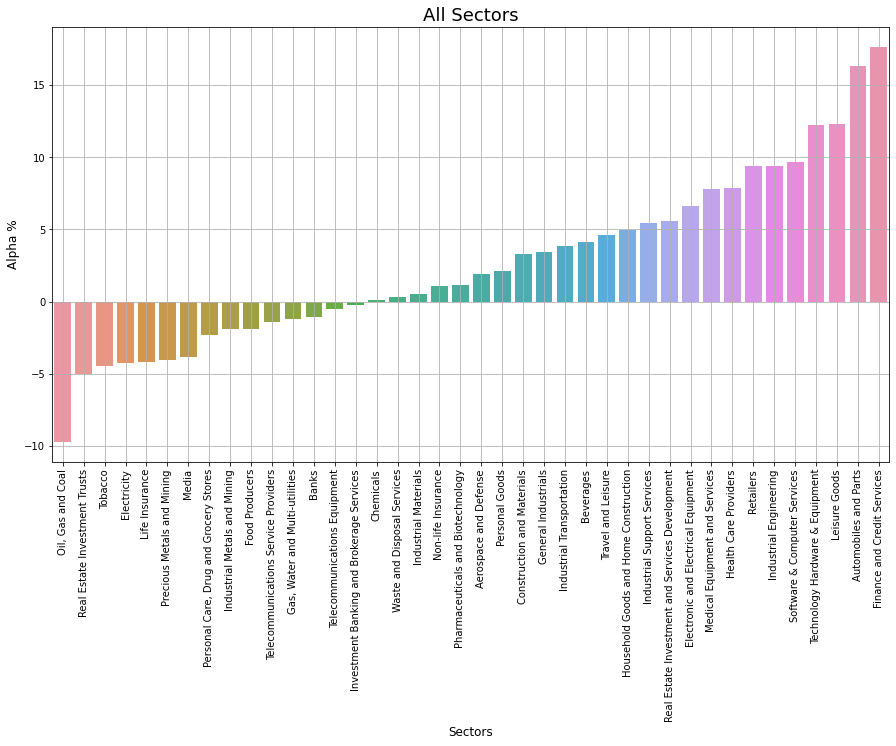

In [59]:

plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Sector', y = 'Alpha',data = jj)
plt.ylabel('Alpha %',fontsize=12)
plt.xlabel('Sectors',fontsize=12)
plt.title('All Sectors',fontsize=18)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.grid()